##KNN and RNN Classifier Performance Analysis - Wine Dataset

In [12]:
# Step 1: Load and Prepare the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Wine dataset from sklearn
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Basic data exploration
print("Feature names:", wine.feature_names)
print("\nClass distribution:", pd.Series(y).value_counts())

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Class distribution: 1    71
0    59
2    48
Name: count, dtype: int64


In [6]:
# Step 2: Implement K-Nearest Neighbors (KNN)
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

# Train and evaluate KNN classifier for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)


In [7]:
# Step 3: Implement Radius Neighbors (RNN)
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

# Train and evaluate RNN classifier for each radius
for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    rnn_accuracies.append(accuracy)


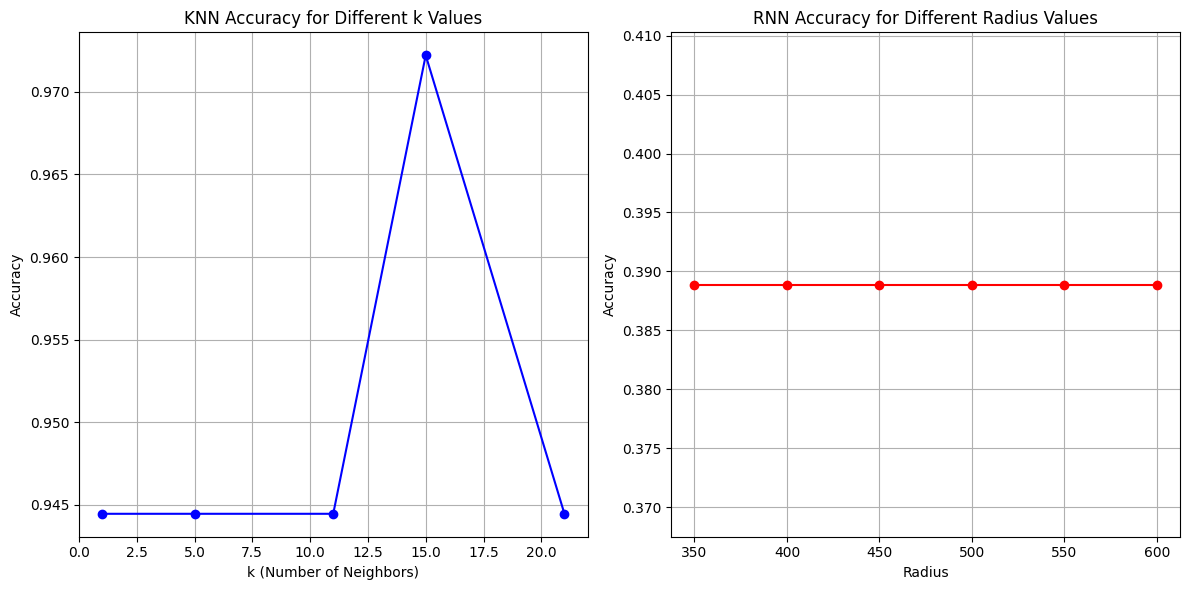

In [8]:
# Step 4: Visualize and Compare Results

# Plot accuracy for KNN
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', color='b')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)

# Plot accuracy for RNN
plt.subplot(1, 2, 2)
plt.plot(radius_values, rnn_accuracies, marker='o', linestyle='-', color='r')
plt.title("RNN Accuracy for Different Radius Values")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

In [9]:
# Step 5: Compare Performance and Discuss Observations
best_knn_k = k_values[np.argmax(knn_accuracies)]
best_rnn_radius = radius_values[np.argmax(rnn_accuracies)]

print("\nBest KNN Performance:")
print(f"Best k value: {best_knn_k}, with accuracy: {max(knn_accuracies)}")

print("\nBest RNN Performance:")
print(f"Best radius value: {best_rnn_radius}, with accuracy: {max(rnn_accuracies)}")


Best KNN Performance:
Best k value: 15, with accuracy: 0.9722222222222222

Best RNN Performance:
Best radius value: 350, with accuracy: 0.3888888888888889


The dataset contains the following features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']. The class distribution is as follows: Class 1: 71 instances, Class 0: 59 instances, and Class 2: 48 instances. For KNN, the best performance was achieved with a k value of 15, yielding an accuracy of 97.22%. For RNN, the best radius value of 350 achieved an accuracy of 38.89%. KNN is preferred when the number of neighbors significantly influences the outcome, while RNN is suited for datasets with irregular decision boundaries.